<a href="https://colab.research.google.com/github/SaiAllada24/Groundwater-Analysis/blob/main/State_and_District_Groundwater_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
statewise=pd.read_csv('Groundwater.csv')
city=pd.read_csv('city_groundwater.csv')

In [6]:
statewise, city

(    _id  Sl. No                          Name of State/UT  \
 0     1     1.0                            Andhra Pradesh   
 1     2     2.0                         Arunachal Pradesh   
 2     3     3.0                                     Assam   
 3     4     4.0                                     Bihar   
 4     5     5.0                              Chhattisgarh   
 5     6     6.0                                       Goa   
 6     7     7.0                                   Gujarat   
 7     8     8.0                                   Haryana   
 8     9     9.0                          Himachal Pradesh   
 9    10    10.0                                 Jharkhand   
 10   11    11.0                                 Karnataka   
 11   12    12.0                                    Kerala   
 12   13    13.0                            Madhya Pradesh   
 13   14    14.0                               Maharashtra   
 14   15    15.0                                   Manipur   
 15   16

In [7]:
city.isnull().sum()

,0
_id,0
Sl. No,0
Name of District,0
Monsoon season recharge from rainfall,0
Monsoon season recharge from other sources,0
Non-monsoon season recharge from rainfall,0
Non-monsoon season recharge from other sources,0
Total annual groundwater recharge,0
Total Natural Discharges,0
Annual Extractable Groundwater Resource,0


In [12]:
statewise.isnull().sum()

,0
_id,0
Sl. No,1
Name of State/UT,0
Monsoon season recharge from rainfall (bcm),0
Monsoon season recharge from other sources,0
Non-monsoon season recharge from rainfall,0
Non-monsoon season recharge from other sources,0
Total annual groundwater recharge,0
Total Natural Discharges,0
Annual Extractable Groundwater Resource,0


In [13]:
states=statewise.groupby('Name of State/UT').agg({"Total Annual Extraction":"sum","Total annual groundwater recharge":"sum"})

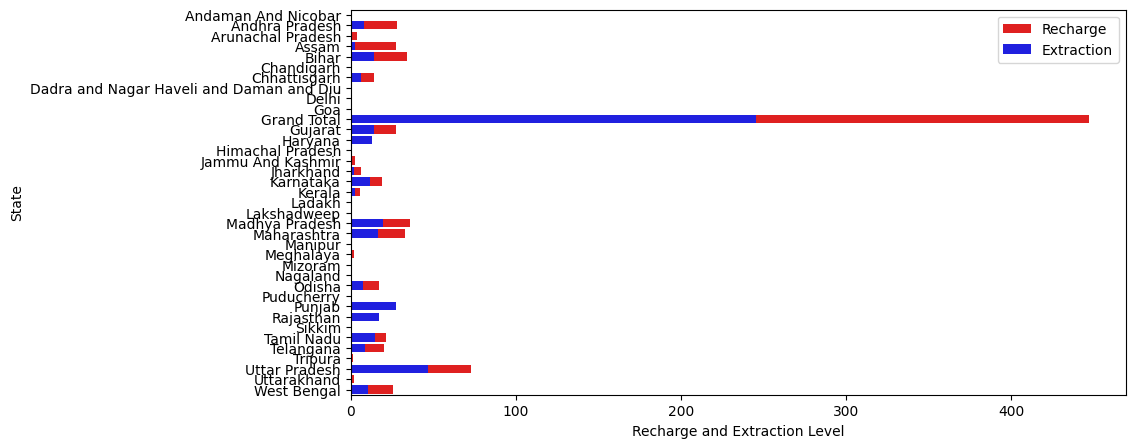

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x="Total annual groundwater recharge",y="Name of State/UT",data=states,color="red",label="Recharge")
sns.barplot(x="Total Annual Extraction",y="Name of State/UT",data=states,color="blue",label="Extraction")
plt.xlabel("Recharge and Extraction Level")
plt.ylabel("State")
plt.legend()
plt.show()


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Net Groundwater Availability
statewise["Net_Groundwater"] = (
    statewise["Total annual groundwater recharge"]
    - statewise["Total Annual Extraction"]
    - statewise["Annual GW Allocation for domestic use (2025)"]
)

# Summing up total groundwater availability (optional check)
print("Total Net Groundwater Availability:", statewise["Net_Groundwater"].sum())


Total Net Groundwater Availability: 340.262


<Figure size 2000x1000 with 0 Axes>

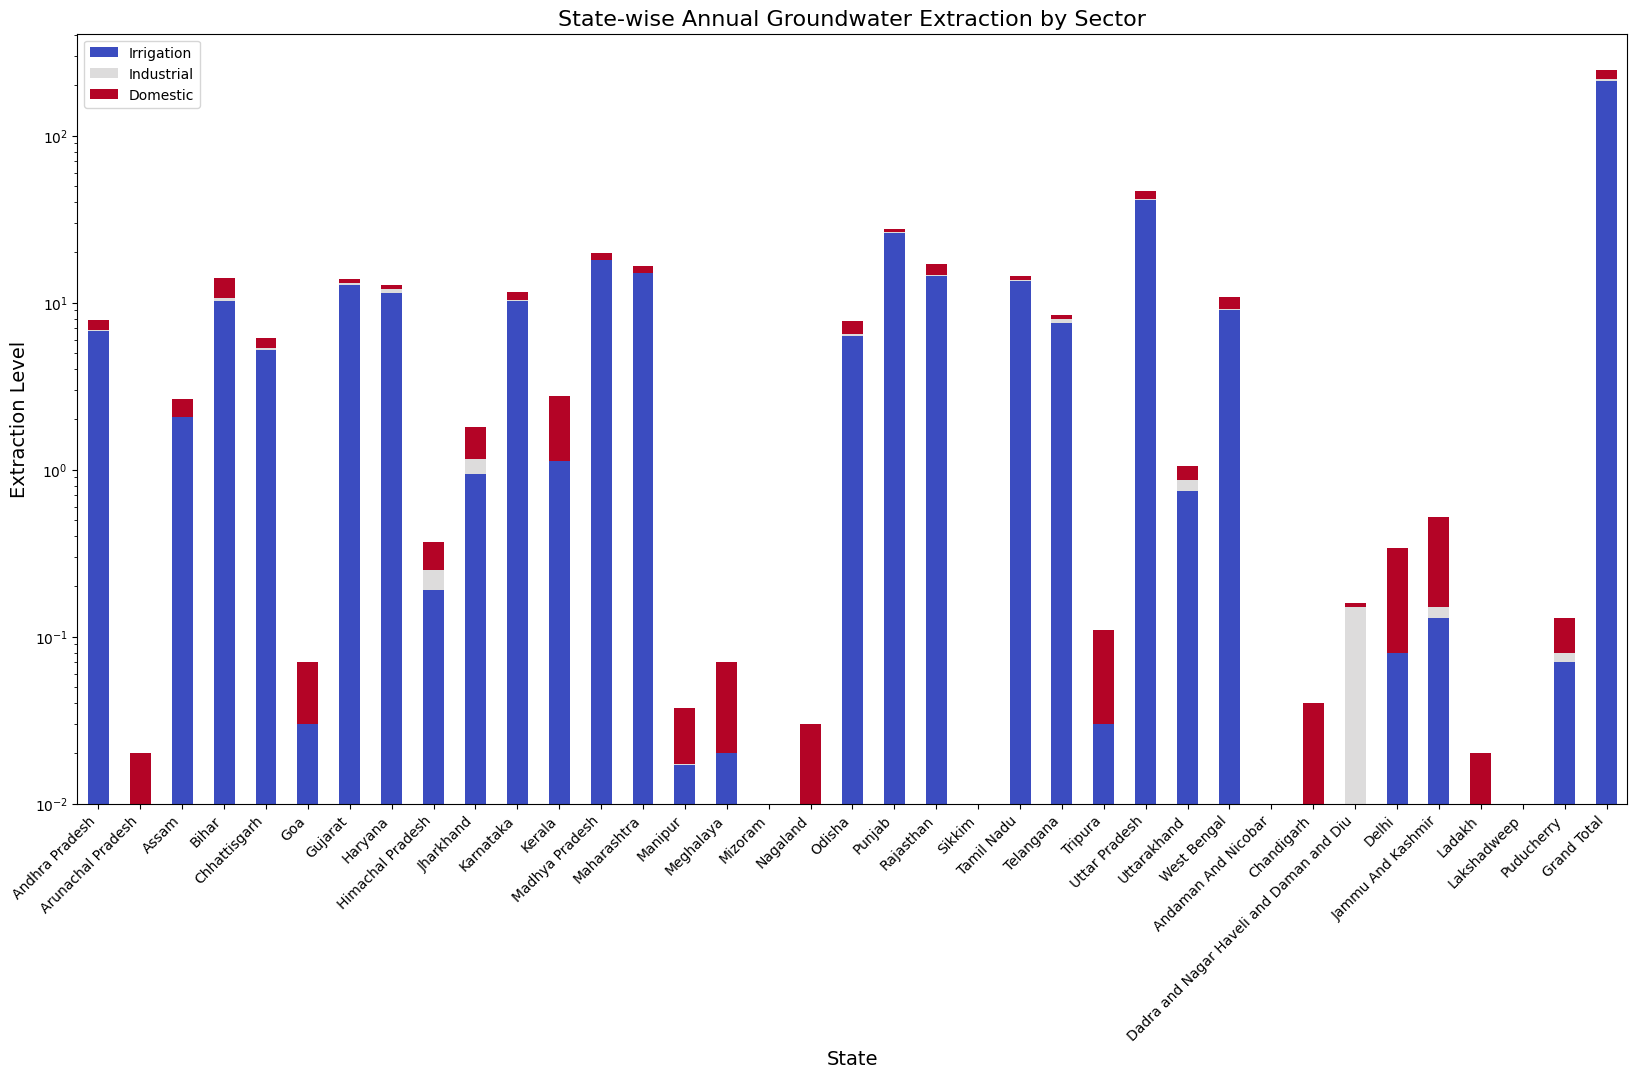

In [61]:

plt.figure(figsize=(20, 10))

# Stacked bars to highlight small values
statewise.set_index("Name of State/UT")[["Irrigation - Annual extraction",
                                         "Industrial - Annual extraction",
                                         "Domestic - Annual Extraction"]].plot(
    kind="bar", stacked=True, figsize=(20, 10), colormap="coolwarm"
)

# Labels and title
plt.xlabel("State", fontsize=14)
plt.ylabel("Extraction Level", fontsize=14)
plt.title("State-wise Annual Groundwater Extraction by Sector", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Optional: Log scale if differences are too large
plt.yscale("log")  # Uncomment this line if needed

# Show legend
plt.legend(["Irrigation", "Industrial", "Domestic"])

plt.show()


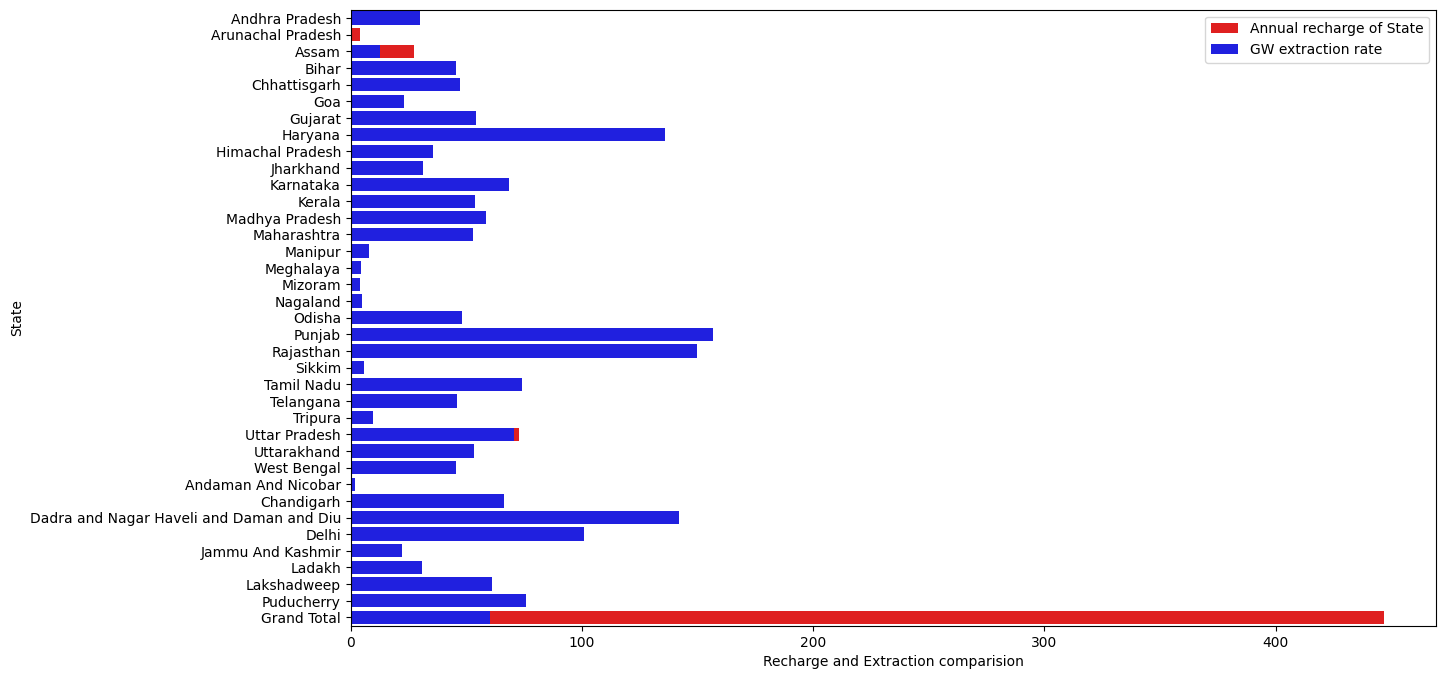

In [67]:
plt.figure(figsize=(14, 8))
sns.barplot(x="Total annual groundwater recharge",y="Name of State/UT", data=statewise,color="red",label="Annual recharge of State")
sns.barplot(x="Stage of GW extraction (%)",y="Name of State/UT", data=statewise,color="blue",label="GW extraction rate")
plt.xlabel("Recharge and Extraction comparision")
plt.ylabel("State")
plt.legend()


In [63]:
cities=city.groupby('Name of District').agg({"Total Annual Extraction":"sum","Total annual groundwater recharge":"sum"})

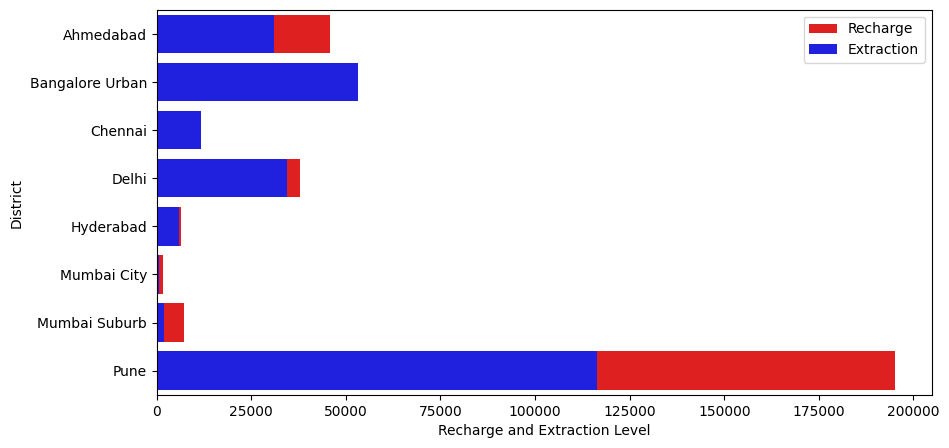

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(x="Total annual groundwater recharge",y="Name of District",data=cities,color="red",label="Recharge")
sns.barplot(x="Total Annual Extraction",y="Name of District",data=cities,color="blue",label="Extraction")
plt.xlabel("Recharge and Extraction Level")
plt.ylabel("District")
plt.legend()
plt.show()


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Net Groundwater Availability
city["Net_Groundwater"] = (
    city["Total annual groundwater recharge"]
    - city["Total Annual Extraction"]
    - city["Annual GW Allocation for domestic use (2025)"]
)

# Summing up total groundwater availability (optional check)
print("Total Net Groundwater Availability:", statewise["Net_Groundwater"].sum())


Total Net Groundwater Availability: 340.262


<Figure size 2000x1000 with 0 Axes>

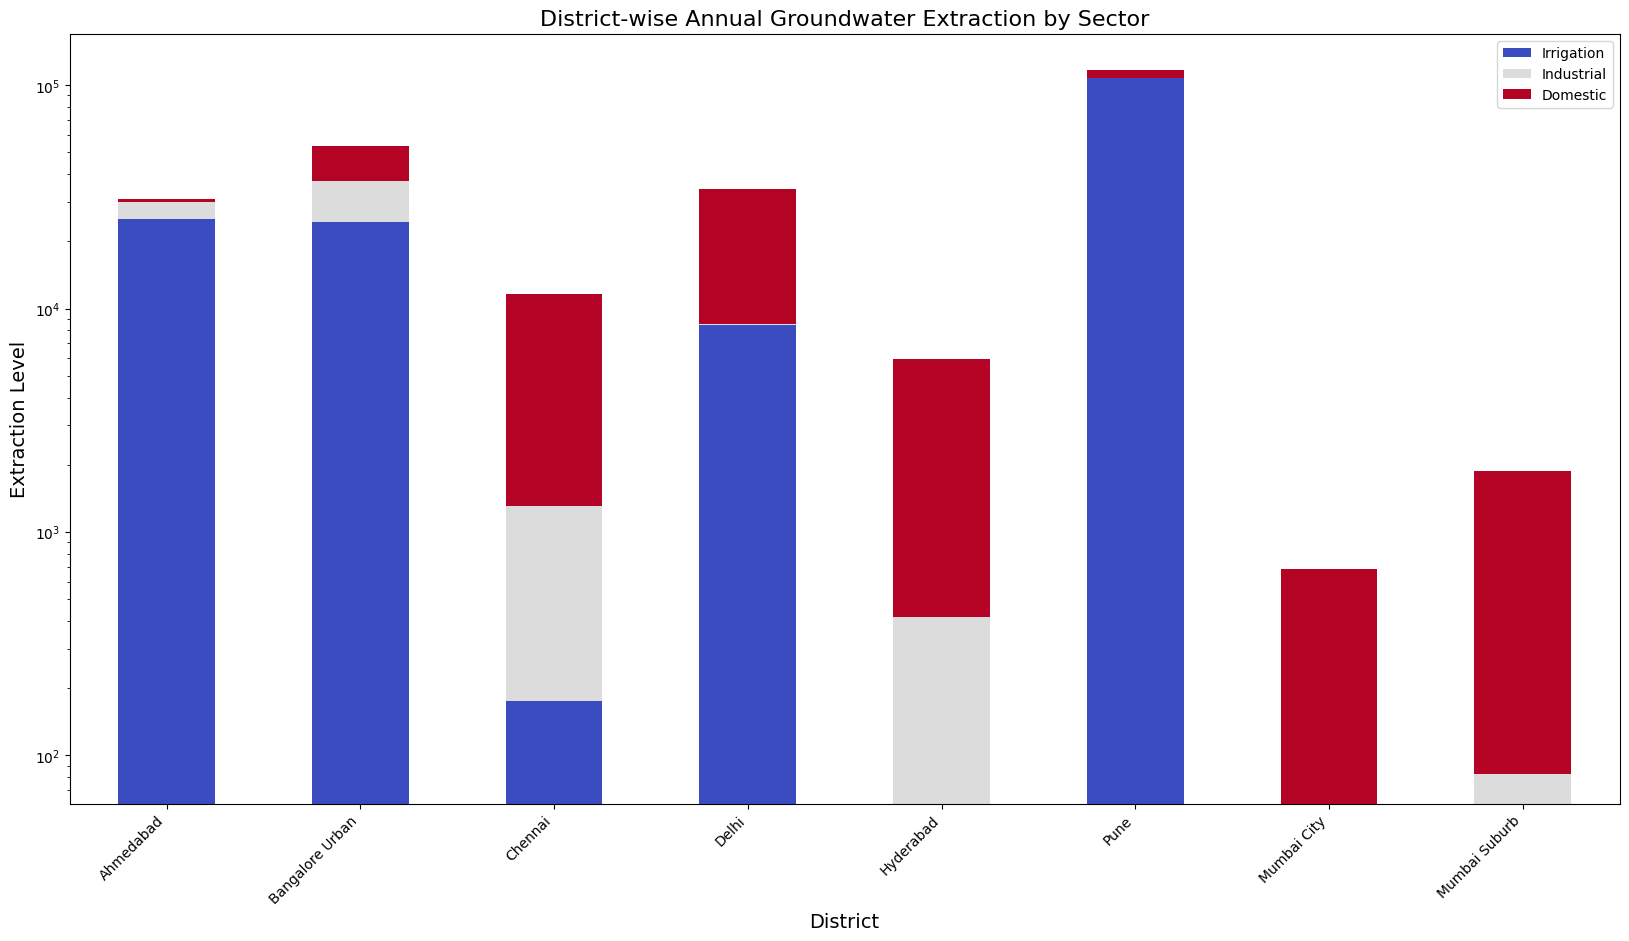

In [80]:

plt.figure(figsize=(20, 10))

# Stacked bars to highlight small values
city.set_index("Name of District")[["Irrigation - Annual extraction",
                                         "Industrial - Annual extraction",
                                         "Domestic - Annual Extraction"]].plot(
    kind="bar", stacked=True, figsize=(20, 10), colormap="coolwarm"
)

# Labels and title
plt.xlabel("District", fontsize=14)
plt.ylabel("Extraction Level", fontsize=14)
plt.title("District-wise Annual Groundwater Extraction by Sector", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Optional: Log scale if differences are too large
plt.yscale("log")  # Uncomment this line if needed

# Show legend
plt.legend(["Irrigation", "Industrial", "Domestic"])

plt.show()
